In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

import matplotlib
from pcygni_profile import PcygniCalculator
import astropy.units as units
import astropy.constants as csts
from scipy.interpolate import interp1d
import lmfit
import time
import pickle
import corner

#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)
        
        
import math
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23

from scipy.integrate import quad
def integral(x): 
    return np.sqrt(1-v**2) * 1/(1-v*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 
reset_plt(18,22)


In [5]:
med = np.array([0.996, 1.00,  0.984, 0.937]) #, 0.9806 ])
low = np.array([0.980, 0.994, 0.967, 0.915]) #, 0.92 ])
hig = np.array([1.013, 1.016, 0.992, 0.979])

(med-low)[0], (hig-med)[0]

(0.016000000000000014, 0.016999999999999904)

In [6]:
med[1], (med-low)[1], (hig-med)[1]

(1.0, 0.006000000000000005, 0.016000000000000014)

In [19]:
# Using Mooley 2022
#1.008207834005335 0.9318665698583503 1.1057698967402503
med = np.array([1.022 , 1.00,  0.977, 0.927, 0.9506 ])
low = np.array([1.000 , 0.993, 0.965, 0.913, 0.931  ])
hig = np.array([1.040, 1.005, 0.988, 0.953 , 1.11   ])
#0.9992296493951798 0.9932760447964241 1.0048375484645602
#1.011149261879917 0.9998831626368528 1.0265532405048734
#(0.97752557109485, 0.9651803300174147, 0.9880904051880259)
#(0.927026653696053, 0.9138803197051459, 0.943016692052247)

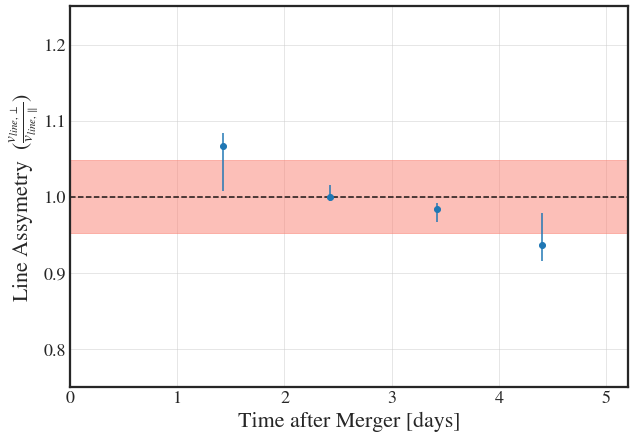

In [4]:
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

fig,ax = plt.subplots(figsize=(10,7))
#epoch 1; (1.0080819078880725, 1.0672151010407185, 1.0844436497880974)
#epoch 2;  1.0004133833583695 0.9940526252289077 1.016837600436107
#epoch 3; (0.9678885678564968, 0.9838849281672327, 0.9918175586442338)
#epoch 4; (0.9011658888317395, 0.9178953112728936, 0.9387460678494983)
   #or with prior on angle 0.9151034744109471 0.9372990979551242 0.9786063145792139
#epoch 5; (0.9757993345154311, 0.9815228764266355, 0.9985086062150125)
    # or with prior (0.9806655459941259, 0.9436878138629707, 1.0104288978150373)
med = np.array([1.067, 1.00,  0.984, 0.937]) #, 0.9806 ])
low = np.array([1.008, 0.994, 0.967, 0.915]) #, 0.92 ])
hig = np.array([1.084, 1.016, 0.992, 0.979]) #, 1.01 ])
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[(med-low), (hig-med)], fmt='o') #, capsize=10
plt.ylim(0.75, 1.25), plt.ylabel(r'Line Assymetry  ($\frac{v_{line,\perp}}{v_{line,\parallel} }$)')

high = 7
plt.fill_between(np.arange(0,high), 1.048*np.ones(len(np.arange(0,high))), (1-0.048)*np.ones(len(np.arange(0,high))), 
                 color='salmon', alpha=0.5, label='EPM')
plt.axhline(1, ls='--', color='k', alpha=0.9)

plt.xlim(0, 5.2), plt.xlabel('Time after Merger [days]')
plt.yticks([0.8, 0.9, 1, 1.1, 1.2]); 

#import seaborn as sb
#sb.despine(fig,ax)

#plt.savefig('Pictures/Line_assymetry_04_07_2.png', dpi=300)

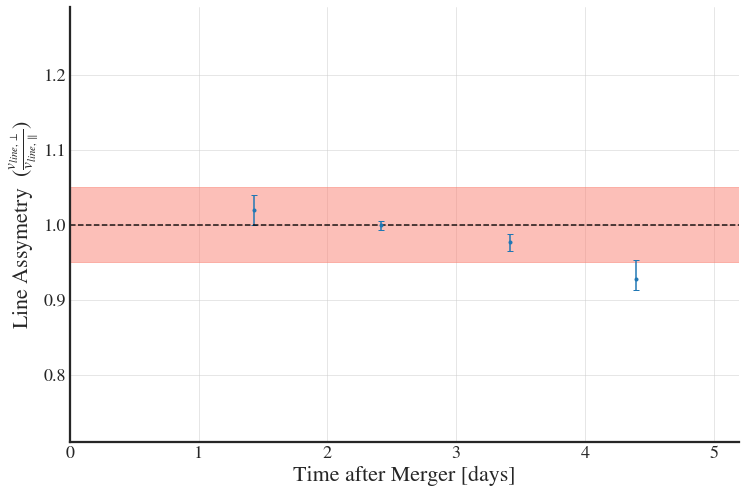

In [21]:
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

fig,ax = plt.subplots(figsize=(12,8))
#epoch 1; (1.0080819078880725, 1.0672151010407185, 1.0844436497880974)
        #(0.9961443220943175, 0.9800545990002372, 1.0128948166852296)
#epoch 2;  1.0004133833583695 0.9940526252289077 1.016837600436107
#epoch 3; (0.9678885678564968, 0.9838849281672327, 0.9918175586442338)
#epoch 4; (0.9011658888317395, 0.9178953112728936, 0.9387460678494983)
   #or with prior on angle 0.9151034744109471 0.9372990979551242 0.9786063145792139
#epoch 5; (0.9757993345154311, 0.9815228764266355, 0.9985086062150125)
    # or with prior (0.9806655459941259, 0.9436878138629707, 1.0104288978150373)
#med = np.array([0.996, 1.00,  0.984, 0.937]) #, 0.9806 ])
#low = np.array([0.980, 0.994, 0.967, 0.915]) #, 0.92 ])
#hig = np.array([1.013, 1.016, 0.992, 0.979]) #, 1.01 ])
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[(med-low), (hig-med)], fmt='.', capsize=3) #, capsize=10
plt.ylim(0.71, 1.29), plt.ylabel(r'Line Assymetry  ($\frac{v_{line,\perp}}{v_{line,\parallel} }$)')

high = 7
plt.fill_between(np.arange(0,high), 1.0495*np.ones(len(np.arange(0,high))), (1-0.0495)*np.ones(len(np.arange(0,high))), 
                 color='salmon', alpha=0.5, label='EPM')
plt.axhline(1, ls='--', color='k', alpha=0.9)

plt.xlim(0, 5.2), plt.xlabel('Time after Merger [days]')
plt.yticks([0.8, 0.9, 1, 1.1, 1.2]); 


#plt.grid(False)
import seaborn as sb
sb.despine(fig,ax) #, offset=20, trim=False)

#plt.savefig('Pictures/Final/Line_assymetry_2_11_2022.pdf', dpi=300)

In [7]:
(0.00049+0.00985)/0.00985

1.0497461928934009

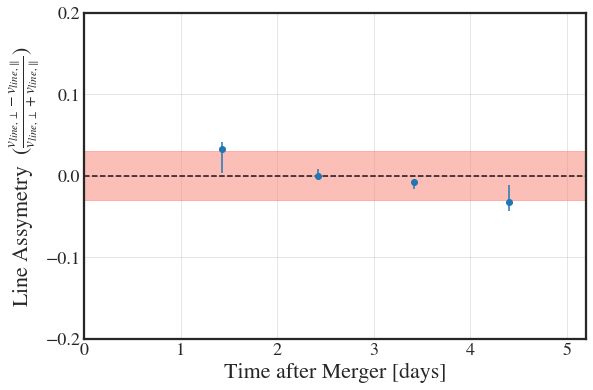

In [46]:
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

fig,ax = plt.subplots(figsize=(9,6))
#epoch 1; (1.0080819078880725, 1.0672151010407185, 1.0844436497880974)
#epoch 2;  1.0004133833583695 0.9940526252289077 1.016837600436107
#epoch 3; (0.9678885678564968, 0.9838849281672327, 0.9918175586442338)
#epoch 4; (0.9011658888317395, 0.9178953112728936, 0.9387460678494983)
   #or with prior on angle 0.9151034744109471 0.9372990979551242 0.9786063145792139
#epoch 5; (0.9757993345154311, 0.9815228764266355, 0.9985086062150125)
    # or with prior (0.9806655459941259, 0.9436878138629707, 1.0104288978150373)
med = np.array([1.067, 1.00,  0.984, 0.937]) #, 0.9806 ])
low = np.array([1.008, 0.994, 0.967, 0.915]) #, 0.92 ])
hig = np.array([1.084, 1.016, 0.992, 0.979]) #, 1.01 ])
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],(med-1)/2,yerr=[(med-low)/2, (hig-med)/2], fmt='o') #, capsize=10
plt.ylabel(r'Line Assymetry  ($\frac{v_{line,\perp}-v_{line,\parallel}}{v_{line,\perp}+v_{line,\parallel} }$)')
plt.fill_between(np.arange(0,7), 0.03*np.ones(len(np.arange(0,7))), -0.03*np.ones(len(np.arange(0,7))), 
                 color='salmon', alpha=0.5, label='EPM')
plt.axhline(0, ls='--', color='k', alpha=0.9)

plt.xlim(0, 5.2), plt.xlabel('Time after Merger [days]')

plt.ylim(0.75-1, 1.25-1), 
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])

plt.ticklabel_format(axis='both', style='plain', useOffset=False)
#plt.savefig('Pictures/Line_assymetry_full_ratio_inclination.png', dpi=300)

((0.0, 6.0), Text(0.5, 0, 'Time after Merger [days]'))

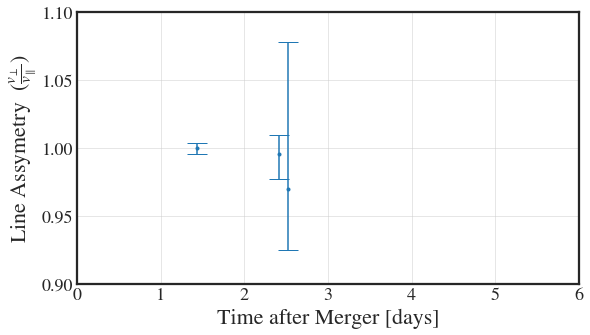

In [20]:
n_days = [1.43, 2.42, 2.42+0.1, 3.42, 4.40, 5.40]

fig,ax = plt.subplots(figsize=(9,5))

#1 & 2: fits at varying inclination
#    3: spread of chains at inclination=0

med = np.array([1.0, 0.9955,  0.97 ])
low = np.array([0.996, 0.977, 0.925 ])
hig = np.array([1.004, 1.010,  1.078])

#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[(med-low), (hig-med)], capsize=10, fmt='.')
plt.ylim(0.9, 1.1), plt.ylabel(r'Line Assymetry  ($\frac{v_\perp}{v_\parallel }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')

#plt.savefig('Pictures/Line_assymetry

((0.0, 6.0), Text(0.5, 0, 'Time after Merger [days]'))

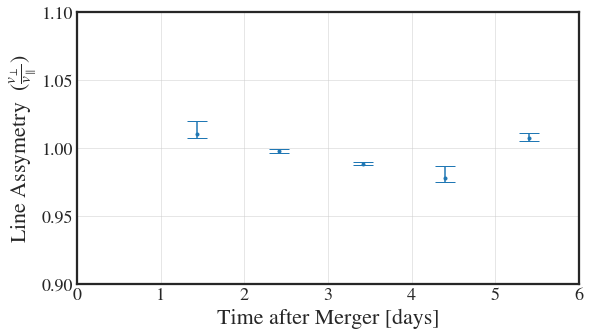

In [23]:
files = ["./data/OB1/OB1_3_peaks_assym_20x10000.pkl", "./Data/OB2/OB2_3_peaks_highaccuracy_assym_with_incl_20x2000_incl21.pkl", 
         "./data/OB3/OB3_3_peaks_assym_100x10000.pkl", "./Data/OB4/OB4_3_peaks_assym_20x5000.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_20x5000.pkl" ] 
#1d emcee chain

#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
fig,ax = plt.subplots(figsize=(9,5))


steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low)
hig = np.array(hig)

med[0] = med[0]+0.002
hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[(med-low), (hig-med)], capsize=10, fmt='.')
plt.ylim(0.9, 1.1), plt.ylabel(r'Line Assymetry  ($\frac{v_\perp}{v_\parallel }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')

#plt.savefig('Pictures/Line_assymetry_1.png', dpi=300)

,T,N,vphot,vmax,tau,ve,occult,amp1,amp2,ratio_vel
0,2966.768480,4.508904e-29,0.161482,0.220033,0.263291,0.297549,20.280922,0.988035,1.190606,1.000089
1,2966.966443,4.507941e-29,0.161491,0.220049,0.263248,0.297522,20.276474,0.987934,1.190707,0.999909
2,2966.422223,4.508797e-29,0.161552,0.220017,0.263178,0.297490,20.281655,0.988029,1.190474,1.000105
3,2966.439893,4.508229e-29,0.161447,0.220001,0.263193,0.297515,20.278327,0.987991,1.190374,1.000000
4,2966.206228,4.508570e-29,0.161470,0.220036,0.263206,0.297496,20.280305,0.987933,1.190555,1.000035
...,...,...,...,...,...,...,...,...,...,...
99995,2974.773521,4.496893e-29,0.168183,0.226378,0.316376,0.532467,13.786913,0.954008,1.185954,1.008798
99996,2974.018650,4.498835e-29,0.165002,0.225327,0.299952,0.616259,13.588259,0.963968,1.187202,1.015074
99997,2974.653800,4.498480e-29,0.168032,0.225323,0.316374,0.531595,13.743836,0.945486,1.190219,1.004996
99998,2973.935373,4.502908e-29,0.168016,0.225588,0.322310,0.511500,13.655343,0.946486,1.186015,1.006308


((0.0, 6.0), Text(0.5, 0, 'Time after Merger [days]'))

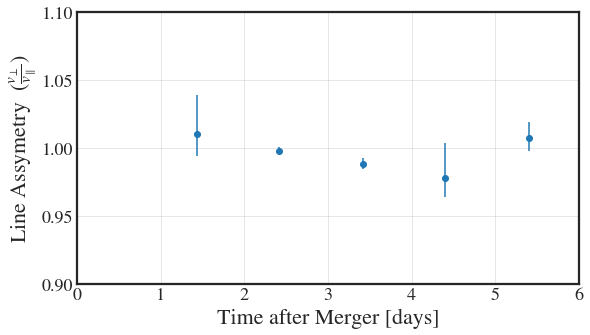

In [12]:
files = ["./data/OB1/OB1_3_peaks_assym_20x10000.pkl", "./Data/OB2/OB2_3_peaks_fixedcontinuum_highaccuracy_assym_with_incl_20x2000_incl28.pkl", 
         "./data/OB3/OB3_3_peaks_assym_100x10000.pkl", "./Data/OB4/OB4_3_peaks_assym_20x5000.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_20x5000.pkl" ] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
fig,ax = plt.subplots(figsize=(9,5))
    
steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low)
hig = np.array(hig)

med[0] = med[0]+0.002
hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[5*(med-low), 3*(hig-med)], fmt='.')
plt.ylim(0.9, 1.1), plt.ylabel(r'Line Assymetry  ($\frac{v_\perp}{v_\parallel }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')

#plt.savefig('Pictures/Line_assymetry_1.png', dpi=300)

In [4]:
np.median(emcee_flatten['ratio_vel'][steady[idx]:])#[steady:]

1.007142871413068

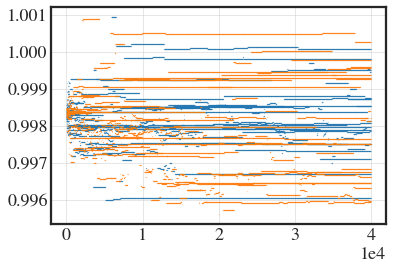

In [10]:
pickle_in = open("./Data/OB2/OB2_3_peaks_fixedcontinuum_highaccuracy_assym_with_incl_20x2000_incl28.pkl","rb")
emcee_res = pickle.load(pickle_in)
emcee_flatten = emcee_res.flatchain

plt.scatter(np.arange(len(emcee_flatten)), emcee_flatten['ratio_vel'], s=0.01)

pickle_in = open("./Data/OB2/OB2_3_peaks_highaccuracy_assym_with_incl_20x2000_incl21.pkl","rb")
emcee_res = pickle.load(pickle_in)
emcee_flatten = emcee_res.flatchain

plt.scatter(np.arange(len(emcee_flatten)), emcee_flatten['ratio_vel'], s=0.01)

In [11]:
emcee_flatten

,T,N,vphot,vmax,tau,ve,occult,amp1,amp2,ratio_vel
0,3925.083990,2.797077e-29,0.248024,0.279441,6.081436,0.171507,1.306045,0.535934,0.555288,0.998428
1,3925.324640,2.796528e-29,0.248037,0.279460,6.080511,0.171493,1.305782,0.535883,0.555332,0.998262
2,3924.717481,2.797024e-29,0.248110,0.279425,6.079337,0.171480,1.306083,0.535931,0.555239,0.998440
3,3924.559169,2.796536e-29,0.248016,0.279437,6.079525,0.171487,1.306029,0.535896,0.555199,0.998347
4,3924.003270,2.796835e-29,0.247992,0.279426,6.078894,0.171483,1.306092,0.535863,0.555257,0.998441
...,...,...,...,...,...,...,...,...,...,...
39995,3924.969863,2.797130e-29,0.247994,0.279263,6.083353,0.171291,1.305207,0.535930,0.555509,0.997646
39996,3925.206944,2.793782e-29,0.246109,0.277475,6.147461,0.170328,1.295934,0.541403,0.556946,0.995967
39997,3926.428345,2.794654e-29,0.248165,0.279614,6.073948,0.171630,1.306064,0.535442,0.554950,0.998200
39998,3924.955333,2.793173e-29,0.247376,0.278837,6.105741,0.170862,1.301629,0.537182,0.555672,0.996324
